In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics

In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the Dataset
dataset = pd.read_csv("/Dataset/preprocessed_data.csv")

In [ ]:
dataset.head()

,Unnamed: 0,Site number,Number of resected lymph nodes,Number of resected lymph nodes.1,Number of metastatic lymph nodes,Number of metastatic lymph nodes.1,Number of hepatic metastases,Number of hepatic metastases.1,Hepatic metastases maximum size (mm),Hepatic metastases maximum size,CEA,CEA (car-old),PATIENT_STATUS,Birth date_year,Birth date_month,Birth date_day,Date of referral in the center_year,Date of referral in the center_month,Date of referral in the center_day,Date of creation of patient_year,Date of creation of patient_month,Date of creation of patient_day,Date of first colectomy_year,Date of first colectomy_month,Date of first colectomy_day,Diagnosis date_year,Diagnosis date_month,Diagnosis date_day,Inclusion criteria_No,Inclusion criteria_Yes,Gender_Female,Gender_Male,Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND,Did the patient have pre-colectomy therapy (radiotherapy excluded)_No,Did the patient have pre-colectomy therapy (radiotherapy excluded)_Yes,Did the patient have pre-colectomy radiotherapy_ND,Did the patient have pre-colectomy radiotherapy_No,Did the patient have pre-colectomy radiotherapy_Yes,Laparoscopic resection_ND,Laparoscopic resection_No,...,Tumor_T3,Tumor_T4,Tumor_T4a,Tumor_T4b,Node_N0,Node_N1,Node_N1a,Node_N1b,Node_N1c,Node_N2,Node_N2a,Node_ND,Metastasis_M0,Metastasis_M1,Metastasis_M1a,Metastasis_M1b,Metastasis_ND,Synchronicity of colorectal cancer_ND,Synchronicity of colorectal cancer_No,Synchronicity of colorectal cancer_Yes,Localization_Bilateral,Localization_ND,Localization_Unilateral,CT scan abdominal_ND,CT scan abdominal_No,CT scan abdominal_Yes,CT scan chest_ND,CT scan chest_No,CT scan chest_Yes,MRI_ND,MRI_No,MRI_Yes,Pet CT_ND,Pet CT_No,Pet CT_Yes,Initial resectability_ND,Initial resectability_No,Initial resectability_Yes,Does the patient have concomitant extra-hepatic metastases_No,Does the patient have concomitant extra-hepatic metastases_Yes
0,0,95,13.0,10.0,0.0,0.0,1.0,1.0,56.0,56.0,879.0,879.0,1,1953.0,1.0,24.0,2008.0,7.0,4.0,2018,6,15,2012.0,5.0,15.0,2008.0,6.0,13.0,0,1,0,1,0,1,0,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
1,1,95,8.0,16.0,2.0,3.0,1.0,1.0,30.0,30.0,1.0,35.0,1,1956.0,10.0,2.0,2010.0,2.0,26.0,2018,6,15,2015.0,1.0,4.0,2000.0,7.0,1.0,0,1,1,0,0,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0
2,2,95,10.0,6.0,0.0,4.0,1.0,1.0,13.0,20.0,119.0,198.0,0,1940.0,7.0,10.0,2012.0,1.0,27.0,2018,6,15,2000.0,6.0,3.0,2011.0,8.0,23.0,0,1,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
3,3,95,60.0,30.0,0.0,1.0,3.0,3.0,1134.0,70.0,793.0,793.0,1,1933.0,1.0,27.0,2010.0,2.0,19.0,2018,6,15,2011.0,6.0,21.0,2013.0,10.0,8.0,0,1,0,1,0,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0
4,4,95,11.0,19.0,1.0,0.0,6.0,6.0,6.0,6.0,1.0,1.0,0,1934.0,9.0,17.0,2013.0,2.0,22.0,2018,6,15,2012.0,8.0,14.0,2012.0,7.0,18.0,0,1,0,1,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0


In [ ]:
# drop unnecessary columns
drop_columns = ['Unnamed: 0', 'PATIENT_STATUS']

# target label
target_column = 'PATIENT_STATUS'

# Preprocessing
X = dataset.drop(columns=drop_columns, axis=1)
y = dataset[target_column]

print(X.shape)
print(y.shape)

print(X.head())
print(y.head())


(4359, 83)
(4359,)
   Site number  ...  Does the patient have concomitant extra-hepatic metastases_Yes
0           95  ...                                                  0             
1           95  ...                                                  0             
2           95  ...                                                  0             
3           95  ...                                                  0             
4           95  ...                                                  0             

[5 rows x 83 columns]
0    1
1    1
2    0
3    1
4    0
Name: PATIENT_STATUS, dtype: int64


In [ ]:
# Splitting Data
# Split dataset into training set and test set
# 80% training and 20% test

#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109) 

X_train = X
y_train = y

In [ ]:
#Feature scaling
# Scale numeric value for normalization 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

sc_X = StandardScaler()
#sc_X = RobustScaler()
X_train = sc_X.fit_transform(X_train)
#X_test = sc_X.transform(X_test)

print(X_train)
#print(X_test)

[[ 0.16329343 -0.32122068 -0.52149784 ...  0.79727491  0.32351654
  -0.32351654]
 [ 0.16329343 -0.69761878 -0.09032614 ...  0.79727491  0.32351654
  -0.32351654]
 [ 0.16329343 -0.54705954 -0.80894564 ... -1.25427251  0.32351654
  -0.32351654]
 ...
 [-0.46111952 -1.07401688 -0.52149784 ... -1.25427251  0.32351654
  -0.32351654]
 [-0.46111952  1.33493096  1.27505092 ...  0.79727491  0.32351654
  -0.32351654]
 [-0.46111952 -0.09538182 -0.95266954 ... -1.25427251  0.32351654
  -0.32351654]]


# Before Feature selection (SVM XGBoost Naive Bayes)

In [ ]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

#Implementing cross validation
k = 5
seed = 109
kf = KFold(n_splits=k, random_state=seed, shuffle=True)

#Create Classifiers
models = {
    'xgb_clf': XGBClassifier(random_state=seed),
    'nb_clf': BernoulliNB(),
    'svm_clf': svm.SVC(kernel='linear', random_state=seed)
    }

def confusion_matrix_scorer(clf, X, y):
     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

scorings = ['accuracy', 'f1', 'precision', 'recall']

results = {}
results_scoring = {}
for name, model in models.items():
  results[name] = list(cross_val_score(model, X_train, y_train, cv=kf))
  print(name, np.mean(results[name]))

  results_scoring[name] = {}
  for scoring in scorings:
    results_scoring[name][scoring] = {}
    results_scoring[name][scoring]['cv_score'] = list(cross_val_score(model, X_train, y_train, scoring = scoring, cv=kf))
    results_scoring[name][scoring]['mean'] = np.mean(results_scoring[name][scoring]['cv_score'])
    results_scoring[name][scoring]['std'] = np.std(results_scoring[name][scoring]['cv_score'])
  
  results_scoring[name]['confusion_matrix'] = cross_validate(model, X_train, y_train, scoring = confusion_matrix_scorer, cv=kf)

print(results)
print(results_scoring)

xgb_clf 0.7513179515267698
nb_clf 0.6785991531404376
svm_clf 0.7256251382466636
{'xgb_clf': [0.7614678899082569, 0.7408256880733946, 0.7477064220183486, 0.7603211009174312, 0.746268656716418], 'nb_clf': [0.6857798165137615, 0.6559633027522935, 0.6811926605504587, 0.6777522935779816, 0.6923076923076923], 'svm_clf': [0.7419724770642202, 0.698394495412844, 0.7396788990825688, 0.7224770642201835, 0.7256027554535017]}
{'xgb_clf': {'accuracy': {'cv_score': [0.7614678899082569, 0.7408256880733946, 0.7477064220183486, 0.7603211009174312, 0.746268656716418], 'mean': 0.7513179515267698, 'std': 0.008157255223978572}, 'f1': {'cv_score': [0.74, 0.7290167865707434, 0.7222222222222222, 0.7448107448107448, 0.7288343558282209], 'mean': 0.7329768218863864, 'std': 0.00822034161426191}, 'precision': {'cv_score': [0.7474747474747475, 0.7432762836185819, 0.7295918367346939, 0.7176470588235294, 0.7037914691943128], 'mean': 0.7283562791691731, 'std': 0.016172608046520466}, 'recall': {'cv_score': [0.7326732673

[Text(0, 0.5, 'accuracy'),
 Text(0.5, 1.0, 'Cross validation score(Before feature selection)')]

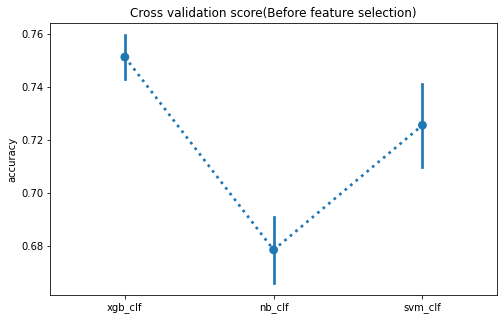

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot showing the Cross Validation score

results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(8, 5))
p = sns.pointplot(data=results_df, ci='sd', dodge=0.25, linestyles='dotted')
p.set(ylabel='accuracy', title='Cross validation score(Before feature selection)')

# After Feature selection

In [ ]:
# Splitting the selected features Data
# Split dataset into training set and test set
# 80% training and 20% test

from sklearn.model_selection import train_test_split


selected_features = ['Pet CT_Yes', 'Localization_Unilateral', 'Initial resectability_No', 'Date of creation of patient_day', 'Date of referral in the center_year', 'Date of first colectomy_year', 'Diagnosis date_year', 'Birth date_year', 'Node_N2', 'MRI_No', 'Date of creation of patient_month']


#X_selected_train, X_selected_test, y_selected_train, y_selected_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=109) 

X_selected_train = X[selected_features]
y_selected_train = y
#Feature scaling
# Scale numeric value for normalization 
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_selected_train = sc_X.fit_transform(X_selected_train)
#X_selected_test = sc_X.transform(X_selected_test)

print(X_selected_train.shape)
#print(X_selected_test.shape)

In [ ]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

#Implementing cross validation
k = 5
seed = 109
kf = KFold(n_splits=k, random_state=seed, shuffle=True)

#Create Classifiers
models = {
    'xgb_clf': XGBClassifier(random_state=seed),
    'nb_clf': BernoulliNB(),
    'svm_clf': svm.SVC(kernel='linear', random_state=seed)
    }

def confusion_matrix_scorer(clf, X, y):
     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

scorings = ['accuracy', 'f1', 'precision', 'recall']

results = {}
results_scoring = {}
for name, model in models.items():
  results[name] = list(cross_val_score(model, X_selected_train, y_selected_train, cv=kf))
  print(name, np.mean(results[name]))

  results_scoring[name] = {}
  for scoring in scorings:
    results_scoring[name][scoring] = {}
    results_scoring[name][scoring]['cv_score'] = list(cross_val_score(model, X_selected_train, y_selected_train, scoring = scoring, cv=kf))
    results_scoring[name][scoring]['mean'] = np.mean(results_scoring[name][scoring]['cv_score'])
    results_scoring[name][scoring]['std'] = np.std(results_scoring[name][scoring]['cv_score'])
  
  results_scoring[name]['confusion_matrix'] = cross_validate(model, X_selected_train, y_selected_train, scoring = confusion_matrix_scorer, cv=kf)

print(results)
print(results_scoring)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot showing the Cross Validation score

results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(8, 5))
p = sns.pointplot(data=results_df, ci='sd', dodge=0.25, linestyles='dotted')
p.set(ylabel='accuracy', title='Cross validation score(After feature selection)')

# Parameter Tuning

## SVM

In [ ]:
# Sensitivity, Specificity, Precision, Recall, F1 and Confusion Matrix

from sklearn.model_selection import GridSearchCV

# Set the parameters by cross-validation
svm_tuned_parameters = [{'kernel': ['linear'], 'C': [0.001, 0.10, 0.1, 10, 20, 50, 100, 1000]}]

grid = GridSearchCV(svm.SVC(random_state=seed), svm_tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_selected_train, y_selected_train)

means = grid.cv_results_['mean_test_score']
stds = grid.cv_results_['std_test_score']
#for mean, std, params in zip(means, stds, grid.cv_results_['params']):
  #print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

    


0.538 (+/-0.001) for {'C': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.001, 'gamma': 0.0001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.001, 'gamma': 1e-05, 'kernel': 'rbf'}
0.714 (+/-0.030) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.582 (+/-0.010) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.714 (+/-0.030) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.582 (+/-0.010) for {'C': 0.1, 'gamma': 0.001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.538 (+/-0.001) for {'C': 0.1, 'gamma': 1e-05, 'kernel': 'rbf'}
0.727 (+/-0.026) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.722 (+/-0.022) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.716 (+/-0.023) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.584 (+/-0.009) for

In [ ]:
print("best_params_:")
print(grid.best_params_)

print("best_estimator_:")
print(grid.best_estimator_)

best_params_:
{'C': 50, 'gamma': 0.01, 'kernel': 'rbf'}
best_estimator_:
SVC(C=50, gamma=0.01)


## XGBoost

In [ ]:
# A parameter grid for XGBoost

xgboost_tuned_parameters = {
    'max_depth': range (1, 3, 5),
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.1, 0.01, 0.05]
}

grid = GridSearchCV(XGBClassifier(random_state=seed), xgboost_tuned_parameters, cv=5, scoring='accuracy')
grid.fit(X_selected_train, y_selected_train)

print("XGBoost : best_params_:")
print(grid.best_params_)

print("XGBoost : best_estimator_:")
print(grid.best_estimator_)

XGBoost : best_params_:
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
XGBoost : best_estimator_:
XGBClassifier(max_depth=1, random_state=109)


# After parameter tuning

In [ ]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

from xgboost import XGBClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

#Implementing cross validation
k = 5
seed = 109
kf = KFold(n_splits=k, random_state=seed, shuffle=True)

#Create Classifiers
models = {
    'xgb_clf': XGBClassifier(learning_rate = 0.1, max_depth = 5, n_estimators = 100, random_state=seed),
    'nb_clf': BernoulliNB(),
    'svm_clf': svm.SVC(kernel='rbf', C=50, gamma=0.01, random_state=seed)
    }


def confusion_matrix_scorer(clf, X, y):
     y_pred = clf.predict(X)
     cm = confusion_matrix(y, y_pred)
     return {'tn': cm[0, 0], 'fp': cm[0, 1],
             'fn': cm[1, 0], 'tp': cm[1, 1]}

scorings = ['accuracy', 'f1', 'precision', 'recall']

results = {}
results_scoring = {}
for name, model in models.items():
  results[name] = list(cross_val_score(model, X_selected_train, y_selected_train, cv=kf))
  print(name, np.mean(results[name]))

  results_scoring[name] = {}
  for scoring in scorings:
    results_scoring[name][scoring] = {}
    results_scoring[name][scoring]['cv_score'] = list(cross_val_score(model, X_selected_train, y_selected_train, scoring = scoring, cv=kf))
    results_scoring[name][scoring]['mean'] = np.mean(results_scoring[name][scoring]['cv_score'])
    results_scoring[name][scoring]['std'] = np.std(results_scoring[name][scoring]['cv_score'])
  
  results_scoring[name]['confusion_matrix'] = cross_validate(model, X_selected_train, y_selected_train, scoring = confusion_matrix_scorer, cv=kf)

print(results)
print(results_scoring)

xgb_clf 0.7409963239553818
nb_clf 0.721491694667102
svm_clf 0.7393889760793773
{'xgb_clf': [0.7465596330275229, 0.7259174311926605, 0.7454128440366973, 0.7431192660550459, 0.7439724454649828], 'nb_clf': [0.7431192660550459, 0.7075688073394495, 0.7282110091743119, 0.7247706422018348, 0.703788748564868], 'svm_clf': [0.7477064220183486, 0.7224770642201835, 0.7396788990825688, 0.7511467889908257, 0.7359357060849598]}
{'xgb_clf': {'accuracy': {'cv_score': [0.7465596330275229, 0.7259174311926605, 0.7454128440366973, 0.7431192660550459, 0.7439724454649828], 'mean': 0.7409963239553818, 'std': 0.00763142511997484}, 'f1': {'cv_score': [0.7301587301587301, 0.7144563918757467, 0.7272727272727273, 0.7220843672456577, 0.7296969696969696], 'mean': 0.7247338372499662, 'std': 0.005884788594835447}, 'precision': {'cv_score': [0.7204819277108434, 0.7257281553398058, 0.714975845410628, 0.7063106796116505, 0.6967592592592593], 'mean': 0.7128511734664376, 'std': 0.010298417995903019}, 'recall': {'cv_score':

[Text(0, 0.5, 'accuracy'),
 Text(0.5, 1.0, 'Cross validation score(After parameter tuning)')]

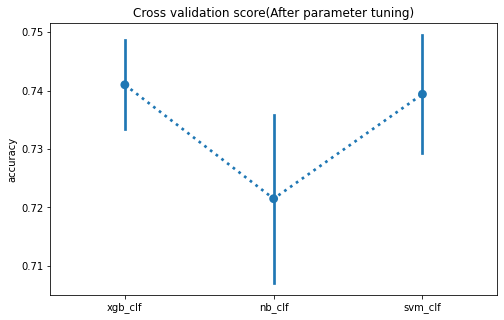

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot showing the Cross Validation score

results_df = pd.DataFrame(results)

fig = plt.figure(figsize=(8, 5))
p = sns.pointplot(data=results_df, ci='sd', dodge=0.25, linestyles='dotted')
p.set(ylabel='accuracy', title='Cross validation score(After parameter tuning)')



# SVM

In [ ]:
# Splitting Data
# Split dataset into training set and test set
# 80% training and 20% test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=109) 


In [ ]:
#Feature scaling
# Scale numeric value for normalization 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

print(X_train)
print(X_test)

[[ 0.72959506  0.12624429  0.91852411 ... -1.25739853  0.32168465
  -0.32168465]
 [ 0.32913068 -0.32938501 -0.53641074 ... -1.25739853  0.32168465
  -0.32168465]
 [-1.01155442  0.27812073  0.26380343 ...  0.7952928   0.32168465
  -0.32168465]
 ...
 [ 0.15501573 -0.48126145  1.13676434 ...  0.7952928   0.32168465
  -0.32168465]
 [ 0.72959506  0.88562647  0.84577737 ... -1.25739853  0.32168465
  -0.32168465]
 [ 0.72959506 -1.31658185  1.64599153 ... -1.25739853  0.32168465
  -0.32168465]]
[[-1.01155442  0.5818736   8.04770485 ...  0.7952928   0.32168465
  -0.32168465]
 [-1.01155442 -0.7090761   1.64599153 ... -1.25739853  0.32168465
  -0.32168465]
 [ 0.72959506  0.05030607 -0.02718354 ...  0.7952928   0.32168465
  -0.32168465]
 ...
 [-1.01155442 -0.86095254 -0.53641074 ... -1.25739853  0.32168465
  -0.32168465]
 [-0.47179808  0.05030607  1.64599153 ...  0.7952928   0.32168465
  -0.32168465]
 [-1.41201881 -0.02563214 -0.24542377 ...  0.7952928   0.32168465
  -0.32168465]]


In [ ]:
# Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear', random_state=109) # Linear Kernel 74%
#clf = svm.SVC(kernel='poly', random_state=109) # poly Kernel 70%
#clf = svm.SVC(kernel='rbf', random_state=109) # rbf Kernel 73%

clf.fit(X_train, y_train) #Train the model using the training sets
y_pred = clf.predict(X_test) #Predict the response for test dataset

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7419724770642202


In [ ]:
from sklearn.feature_selection import RFECV
from sklearn import svm
from sklearn.model_selection import StratifiedKFold

clf = svm.SVC(kernel='linear') # linear Kernel
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')
#rfecv = RFECV(estimator=clf, step=1, cv=StratifiedKFold(2), scoring='accuracy') # Stratified fold inorder to reduce bias
#rfecv = RFECV(estimator=clf)
rfetrain=rfecv.fit_transform(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)


Optimal number of features : 17


In [ ]:
columns_retained_RFECV = X.columns[rfecv.get_support()].values
print(len(columns_retained_RFECV))
print(columns_retained_RFECV)

17
['Birth date_year' 'Date of referral in the center_year'
 'Date of creation of patient_month' 'Date of creation of patient_day'
 'Date of first colectomy_year' 'Diagnosis date_year' 'Diagnosis date_day'
 'Node_N2' 'Synchronicity of colorectal cancer_ND'
 'Localization_Unilateral' 'CT scan abdominal_ND' 'CT scan chest_ND'
 'CT scan chest_No' 'CT scan chest_Yes' 'MRI_No' 'Pet CT_Yes'
 'Initial resectability_No']


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


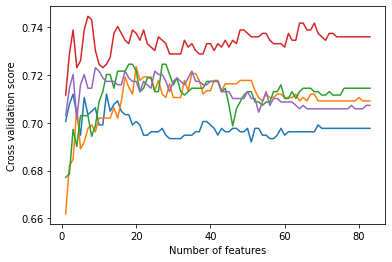

In [ ]:
# Plot showing the Cross Validation score
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

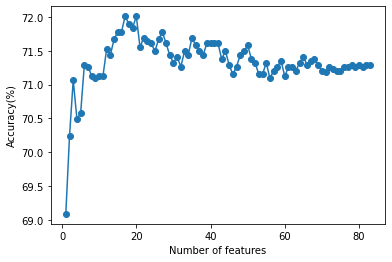

In [ ]:

#plt.title('Recursive feature elimination (RFECV)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), [i*100 for i in rfecv.cv_results_['mean_test_score']], '-o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy(%)')
plt.show()

In [ ]:
rfecv.get_params()

{'cv': 5,
 'estimator': SVC(kernel='linear'),
 'estimator__C': 1.0,
 'estimator__break_ties': False,
 'estimator__cache_size': 200,
 'estimator__class_weight': None,
 'estimator__coef0': 0.0,
 'estimator__decision_function_shape': 'ovr',
 'estimator__degree': 3,
 'estimator__gamma': 'scale',
 'estimator__kernel': 'linear',
 'estimator__max_iter': -1,
 'estimator__probability': False,
 'estimator__random_state': None,
 'estimator__shrinking': True,
 'estimator__tol': 0.001,
 'estimator__verbose': False,
 'importance_getter': 'auto',
 'min_features_to_select': 1,
 'n_jobs': None,
 'scoring': 'accuracy',
 'step': 1,
 'verbose': 0}

In [ ]:
def feature_plot(classifier, feature_names, top_features):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 plt.figure(figsize=(18, 7))
 colors = ['green' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1 + 2 * top_features), feature_names[top_coefficients], rotation=45, ha='right')
 plt.show()



/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


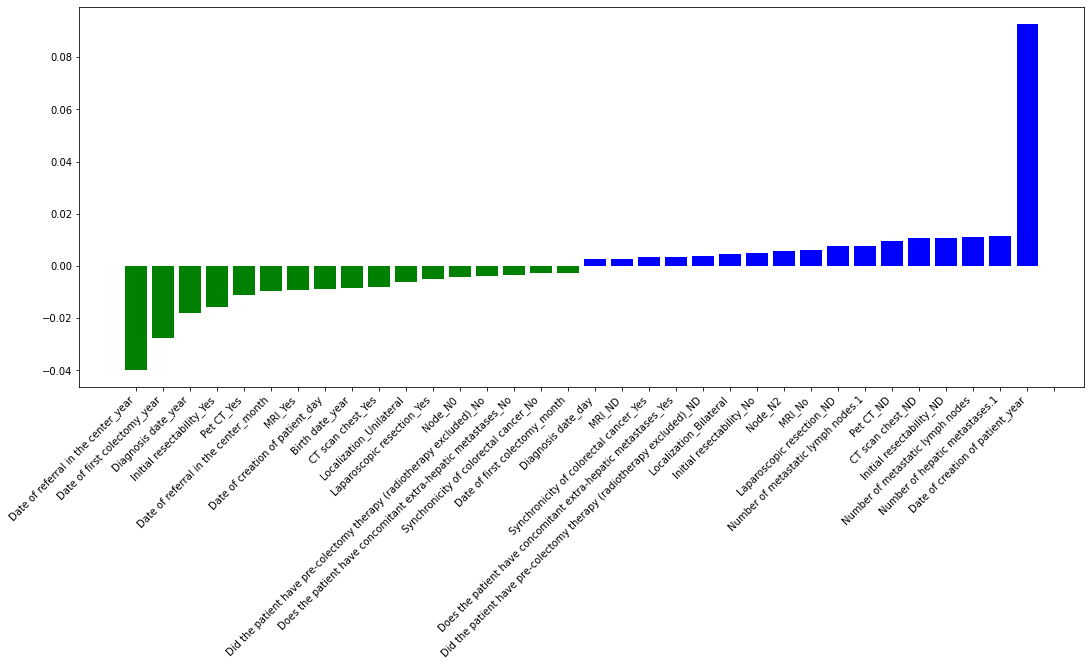

In [ ]:
# green negative coefficients
# blue positive ones
trainedsvm = svm.LinearSVC().fit(X, y)
feature_plot(trainedsvm, X.columns.values, rfecv.n_features_)

# XGBoost

In [ ]:
print(X_train.shape)
print(X_test.shape)

print(X_train)
print(X_test)

(3487, 83)
(872, 83)
[[ 0.72959506  0.12624429  0.91852411 ... -1.25739853  0.32168465
  -0.32168465]
 [ 0.32913068 -0.32938501 -0.53641074 ... -1.25739853  0.32168465
  -0.32168465]
 [-1.01155442  0.27812073  0.26380343 ...  0.7952928   0.32168465
  -0.32168465]
 ...
 [ 0.15501573 -0.48126145  1.13676434 ...  0.7952928   0.32168465
  -0.32168465]
 [ 0.72959506  0.88562647  0.84577737 ... -1.25739853  0.32168465
  -0.32168465]
 [ 0.72959506 -1.31658185  1.64599153 ... -1.25739853  0.32168465
  -0.32168465]]
[[-1.01155442  0.5818736   8.04770485 ...  0.7952928   0.32168465
  -0.32168465]
 [-1.01155442 -0.7090761   1.64599153 ... -1.25739853  0.32168465
  -0.32168465]
 [ 0.72959506  0.05030607 -0.02718354 ...  0.7952928   0.32168465
  -0.32168465]
 ...
 [-1.01155442 -0.86095254 -0.53641074 ... -1.25739853  0.32168465
  -0.32168465]
 [-0.47179808  0.05030607  1.64599153 ...  0.7952928   0.32168465
  -0.32168465]
 [-1.41201881 -0.02563214 -0.24542377 ...  0.7952928   0.32168465
  -0.321684

In [ ]:
#import XGBoost classifier and accuracy
from xgboost import XGBClassifier

X_train = pd.DataFrame(X_train, columns = X.columns)
X_test = pd.DataFrame(X_test, columns = X.columns)

xgb = XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5, random_state=109)
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7431192660550459


## Built-in

In [ ]:
xgb.feature_importances_

array([0.0224071 , 0.01181062, 0.01075062, 0.01301294, 0.01329053,
       0.        , 0.01352201, 0.00980622, 0.01038897, 0.01242806,
       0.0109959 , 0.0130731 , 0.00969379, 0.01084418, 0.07728874,
       0.01509112, 0.00979743, 0.        , 0.02316411, 0.02094998,
       0.03068903, 0.00997901, 0.01119142, 0.03756161, 0.00982985,
       0.01320266, 0.        , 0.        , 0.00755832, 0.        ,
       0.01683236, 0.01228469, 0.00694018, 0.        , 0.00834413,
       0.        , 0.01263201, 0.00920902, 0.00816174, 0.01079035,
       0.        , 0.        , 0.01829408, 0.0075739 , 0.00947205,
       0.        , 0.        , 0.01452769, 0.00848328, 0.        ,
       0.        , 0.        , 0.01585255, 0.        , 0.00992417,
       0.01092228, 0.00749875, 0.        , 0.        , 0.01408749,
       0.        , 0.01018195, 0.01353463, 0.0144664 , 0.00326132,
       0.02243755, 0.00754128, 0.        , 0.02025698, 0.03278744,
       0.00998356, 0.01335815, 0.01244786, 0.01175177, 0.01171

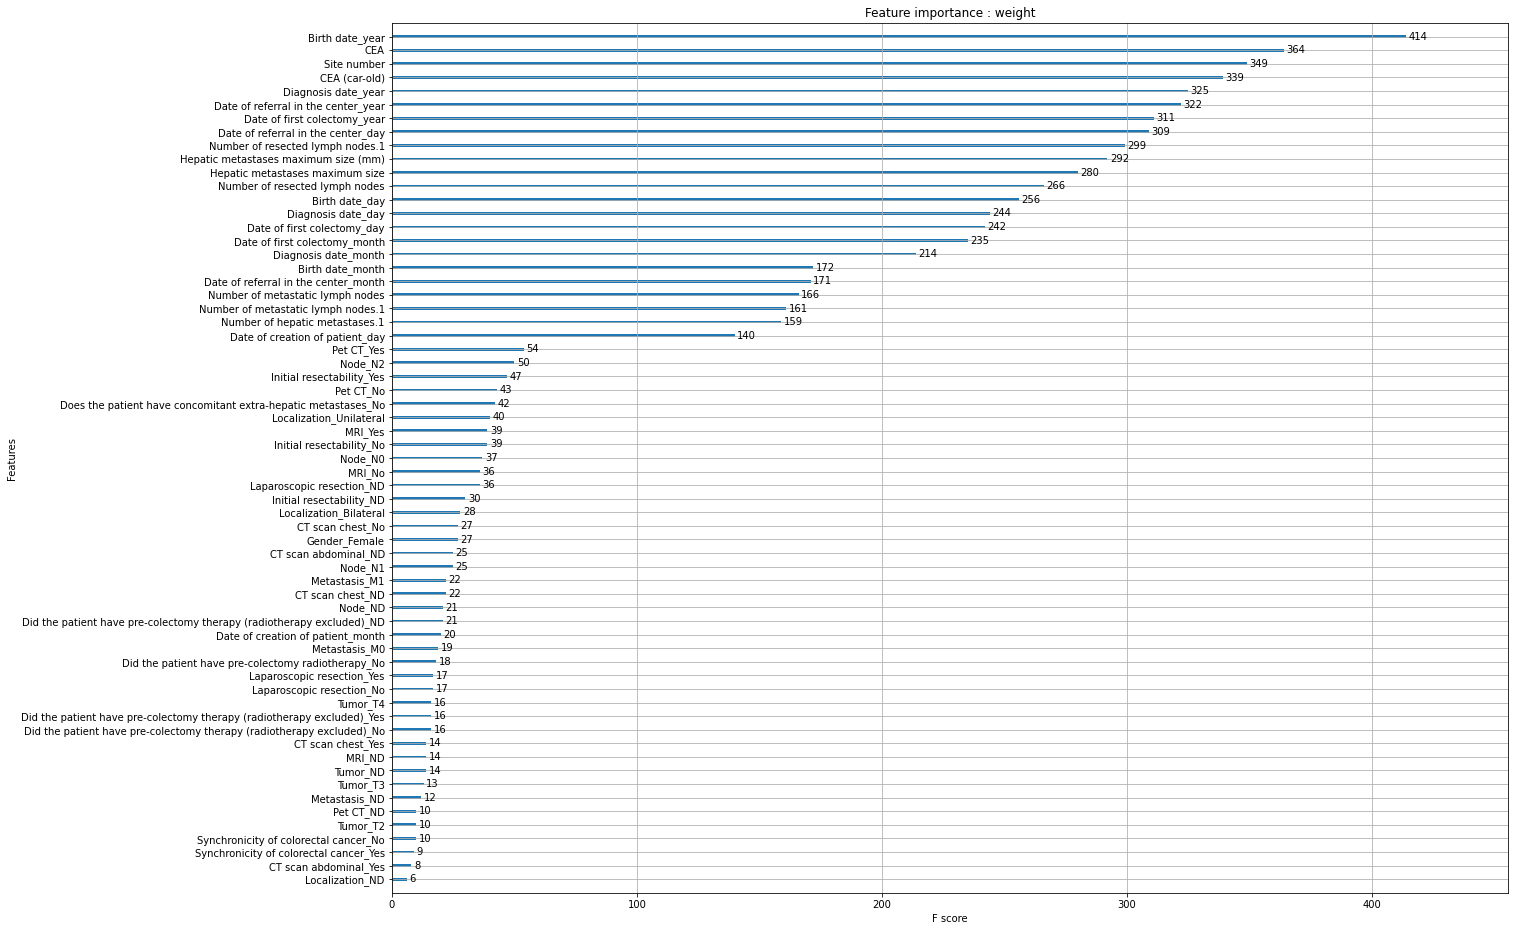

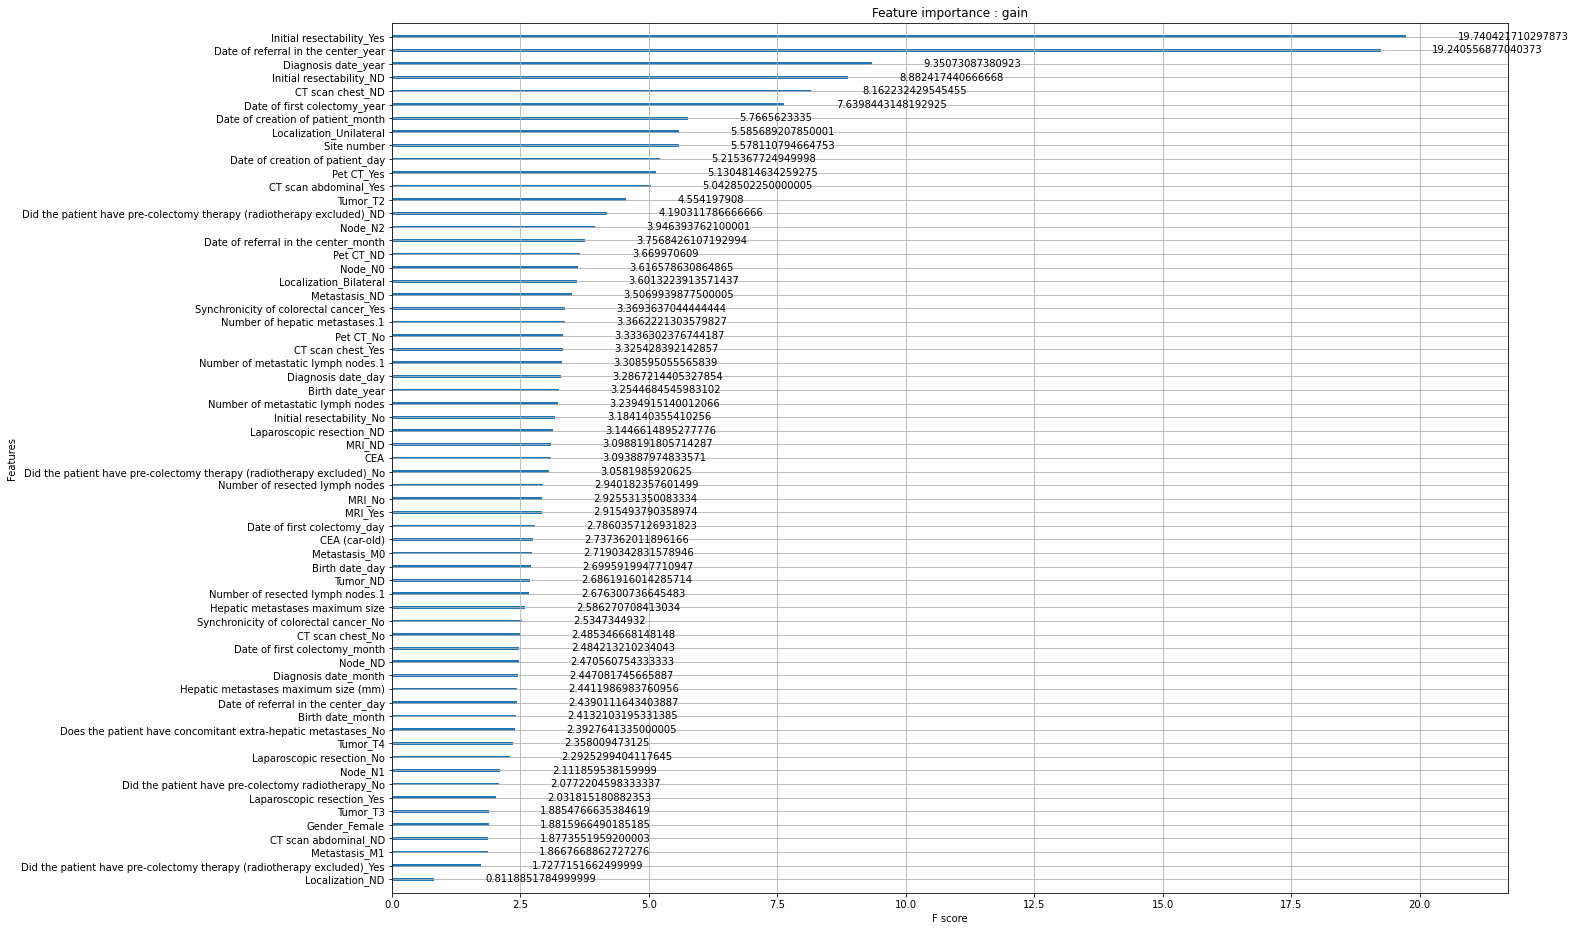

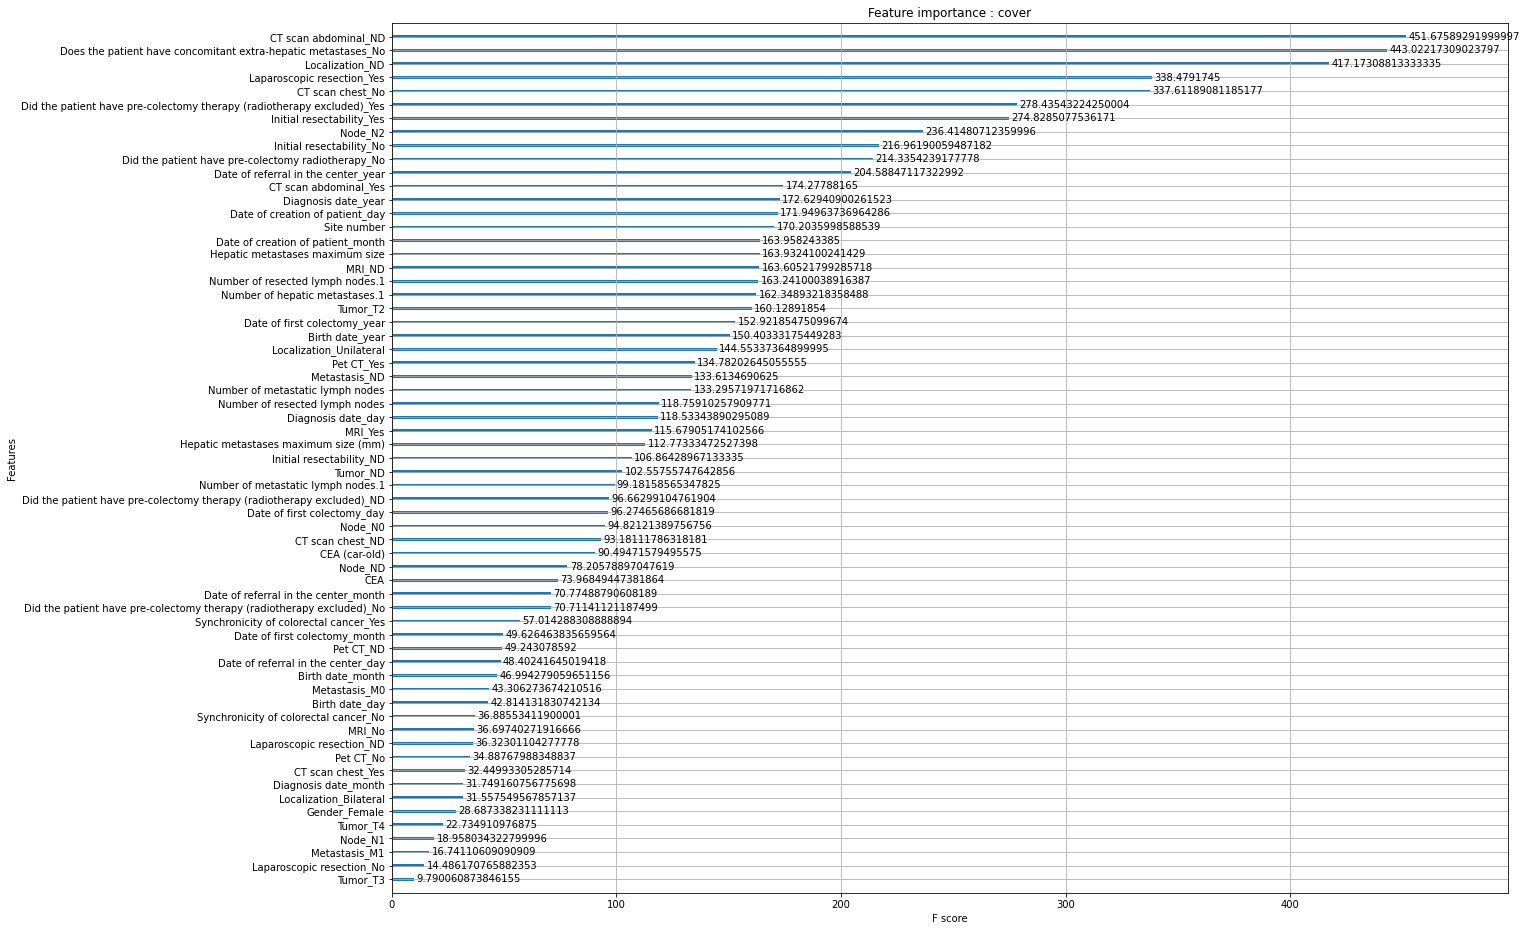

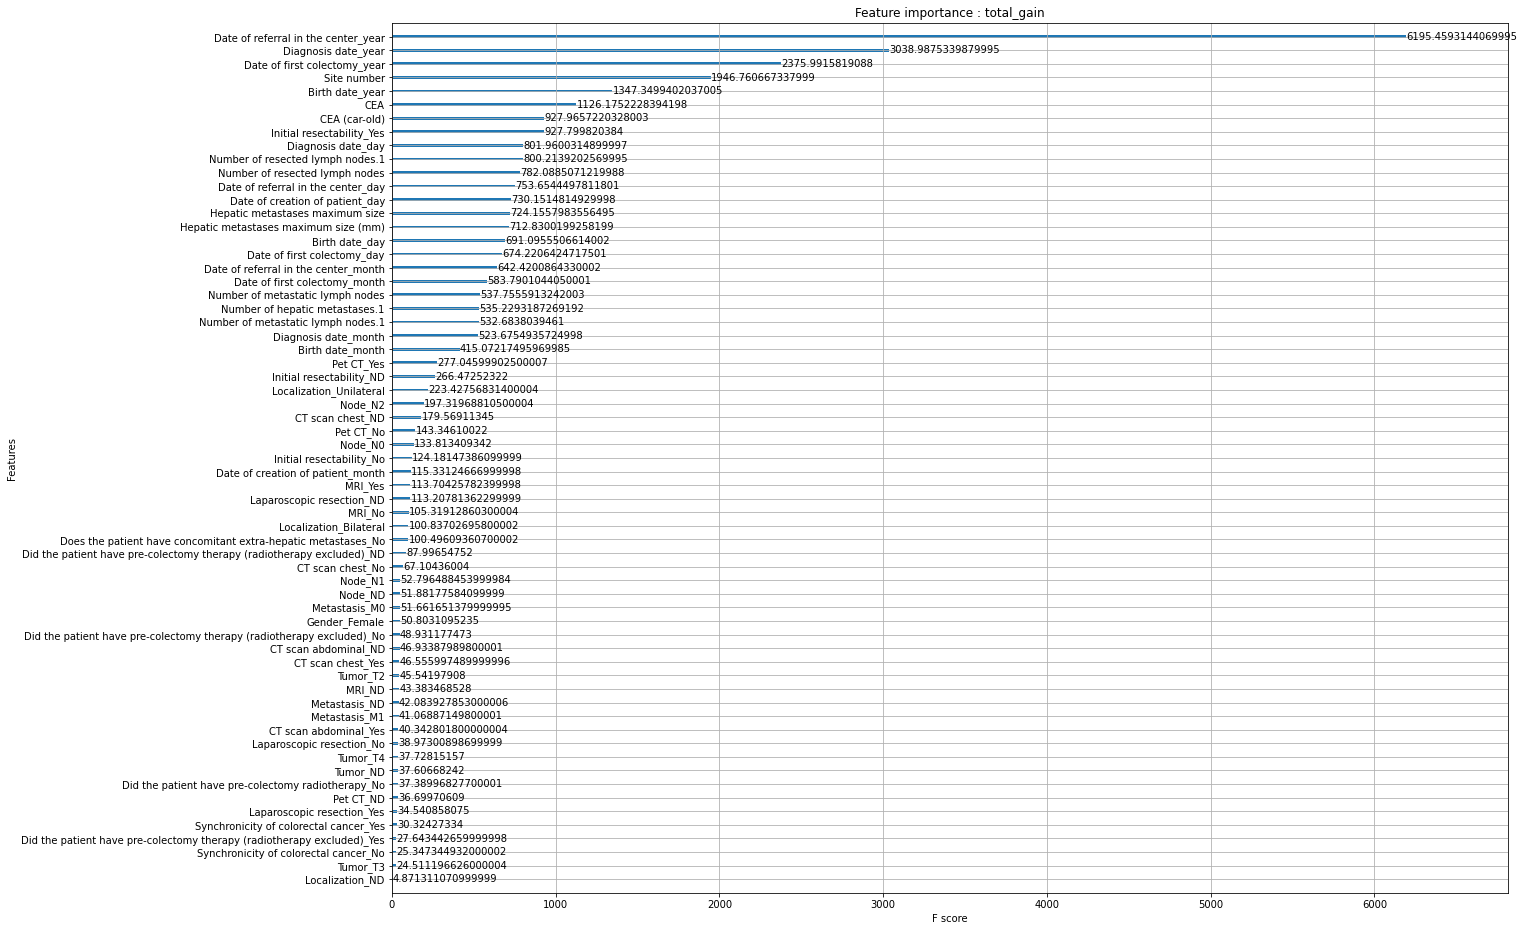

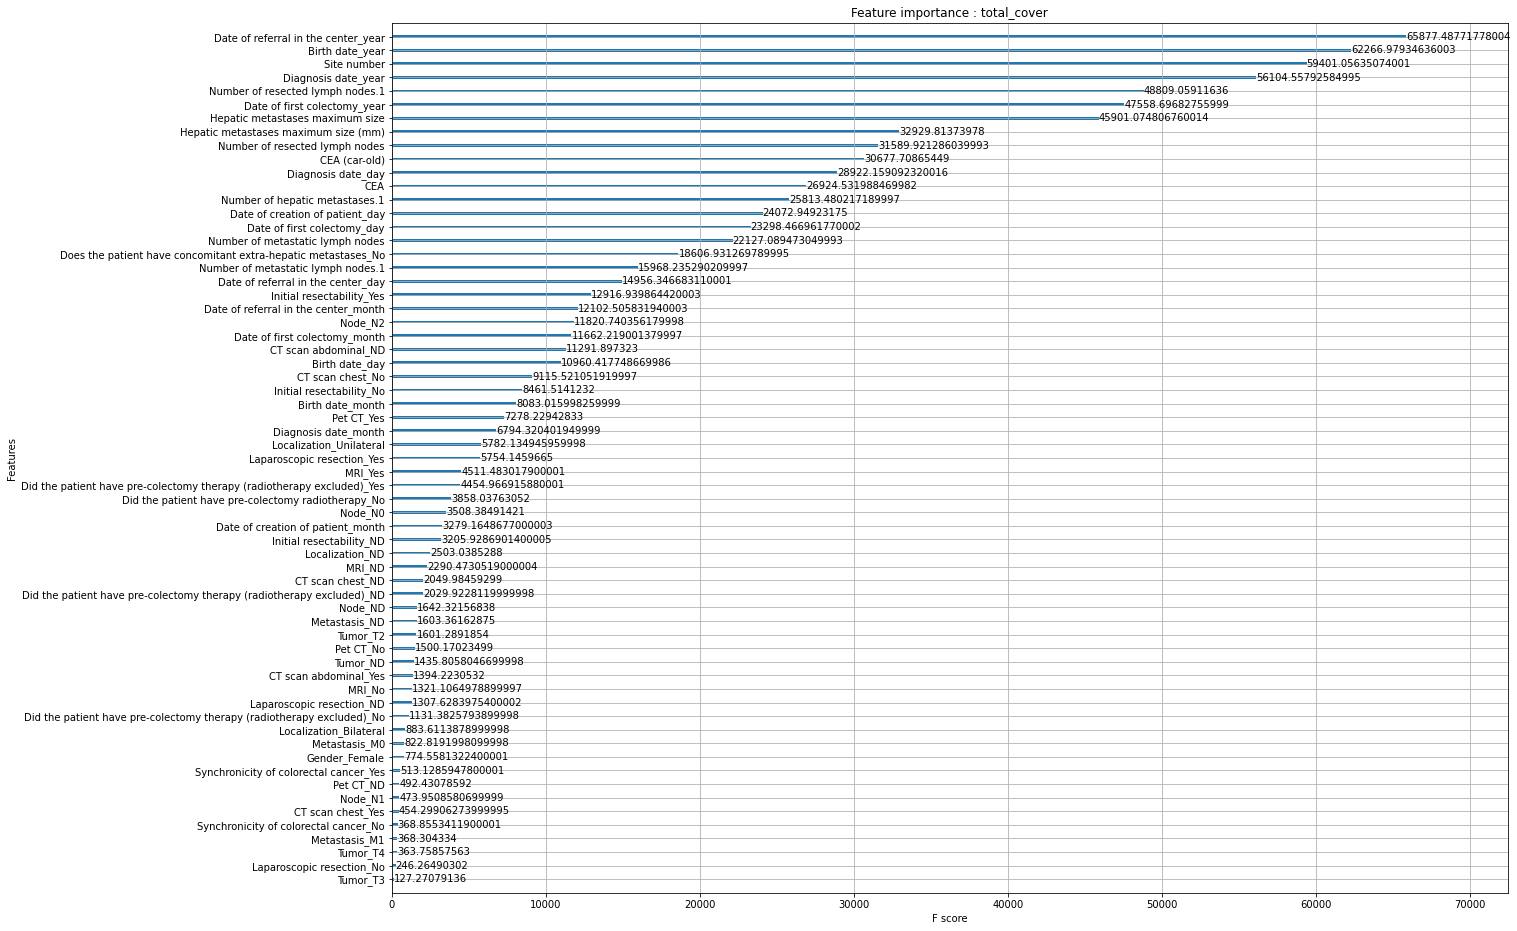

In [ ]:
# ref : https://towardsdatascience.com/be-careful-when-interpreting-your-features-importance-in-xgboost-6e16132588e7
from xgboost import plot_importance

# available metrics in xgb
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
num_of_features = len(X.columns);
# plot feature importance

for f in importance_types:
  fig, ax = plt.subplots(figsize=(20, 16))
  plot_importance(xgb, importance_type=f, title='Feature importance'+' : '+f, max_num_features=num_of_features, ax=ax)
  plt.show()

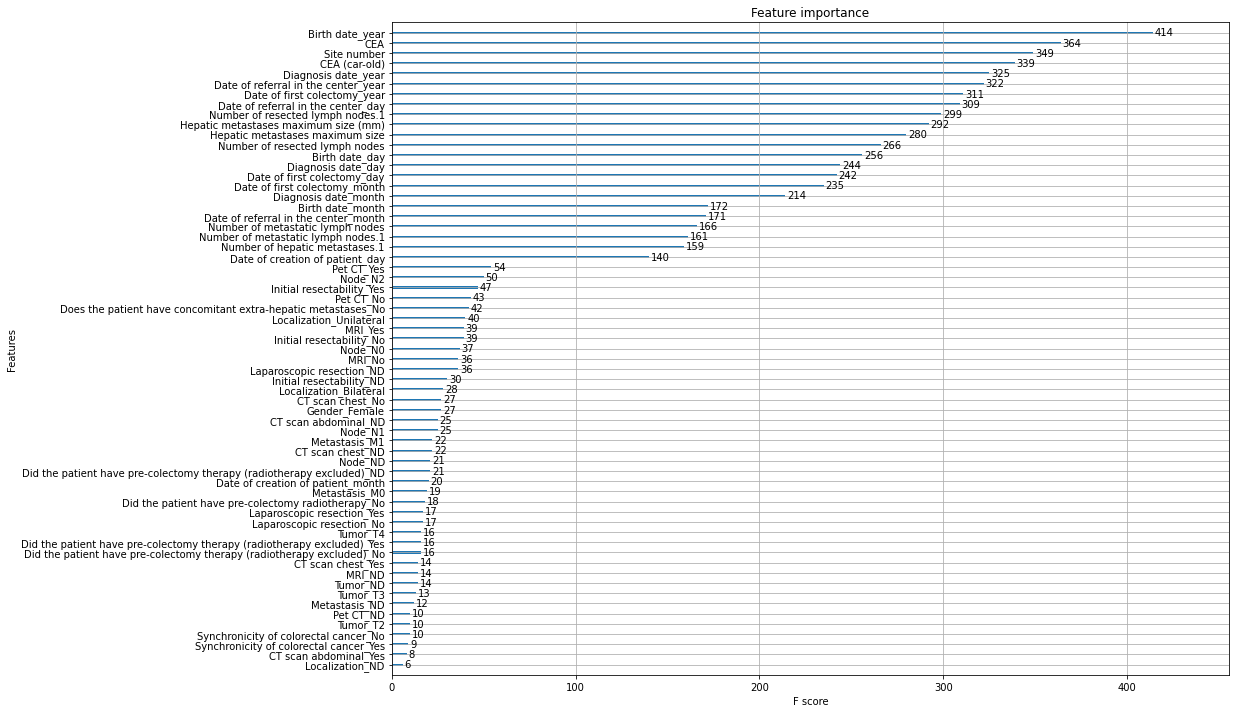

In [ ]:
# available metrics in xgb
importance_types = ['weight']
num_of_features = len(X.columns);

fig, ax = plt.subplots(figsize=(15, 12))
plot_importance(xgb, max_num_features=num_of_features, ax=ax)
plt.show()

In [ ]:
xgb.get_booster().get_fscore()

{'Birth date_day': 256,
 'Birth date_month': 172,
 'Birth date_year': 414,
 'CEA': 364,
 'CEA (car-old)': 339,
 'CT scan abdominal_ND': 25,
 'CT scan abdominal_Yes': 8,
 'CT scan chest_ND': 22,
 'CT scan chest_No': 27,
 'CT scan chest_Yes': 14,
 'Date of creation of patient_day': 140,
 'Date of creation of patient_month': 20,
 'Date of first colectomy_day': 242,
 'Date of first colectomy_month': 235,
 'Date of first colectomy_year': 311,
 'Date of referral in the center_day': 309,
 'Date of referral in the center_month': 171,
 'Date of referral in the center_year': 322,
 'Diagnosis date_day': 244,
 'Diagnosis date_month': 214,
 'Diagnosis date_year': 325,
 'Did the patient have pre-colectomy radiotherapy_No': 18,
 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND': 21,
 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_No': 16,
 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_Yes': 16,
 'Does the patient have concomitant extra-

## RFECV

In [ ]:
#clf = XGBClassifier(random_state=109)
clf = XGBClassifier(learning_rate = 0.05, n_estimators=100, max_depth=5, random_state=109)
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='accuracy')
rfetrain=rfecv.fit_transform(X_train, y_train)
print('Optimal number of features :', rfecv.n_features_)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but RFECV was fitted with feature names
  "X does not have valid feature names, but"


Optimal number of features : 41


In [ ]:
columns_retained_RFECV = X.columns[rfecv.get_support()].values
print(len(columns_retained_RFECV))
print(columns_retained_RFECV)

41
['Site number' 'Number of resected lymph nodes'
 'Number of resected lymph nodes.1' 'Number of metastatic lymph nodes'
 'Number of metastatic lymph nodes.1' 'Number of hepatic metastases.1'
 'CEA' 'CEA (car-old)' 'Birth date_year'
 'Date of referral in the center_year'
 'Date of referral in the center_month'
 'Date of creation of patient_month' 'Date of creation of patient_day'
 'Date of first colectomy_year' 'Date of first colectomy_day'
 'Diagnosis date_year' 'Diagnosis date_day'
 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND'
 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_No'
 'Laparoscopic resection_ND' 'Laparoscopic resection_No' 'Tumor_T2'
 'Node_N0' 'Node_N2' 'Metastasis_ND' 'Localization_Bilateral'
 'Localization_Unilateral' 'CT scan abdominal_ND' 'CT scan abdominal_Yes'
 'CT scan chest_ND' 'CT scan chest_Yes' 'MRI_ND' 'MRI_No' 'MRI_Yes'
 'Pet CT_ND' 'Pet CT_No' 'Pet CT_Yes' 'Initial resectability_ND'
 'Initial resectability_No'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: The `grid_scores_` attribute is deprecated in version 1.0 in favor of `cv_results_` and will be removed in version 1.2.
  warnings.warn(msg, category=FutureWarning)


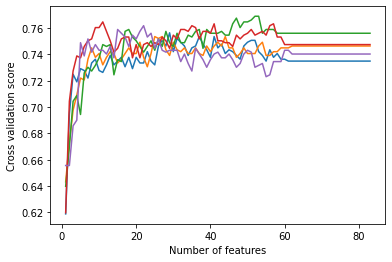

In [ ]:
# Plot showing the Cross Validation score
plt.figure()
plt.xlabel("Number of features")
plt.ylabel("Cross validation score")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

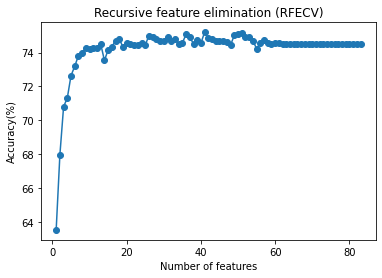

In [ ]:
plt.title('Recursive feature elimination (RFECV)')
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score'])+1), rfecv.cv_results_['mean_test_score']*100, '-o')
plt.xlabel('Number of features')
plt.ylabel('Accuracy(%)')
plt.show()

# **Naive Bayes Classifier**




In [ ]:
from sklearn.naive_bayes import BernoulliNB

nb = BernoulliNB()
nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6834862385321101


In [ ]:
# ref : https://inblog.in/Feature-Importance-in-Naive-Bayes-Classifiers-5qob5d5sFW
from sklearn.inspection import permutation_importance

imps = permutation_importance(nb, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1] # DESC

# Print the feature ranking
print("Feature ranking:")
for f in range(X_test.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Date of referral in the center_year (0.025688)
2. Diagnosis date_year (0.017890)
3. Date of first colectomy_year (0.009862)
4. Birth date_year (0.007110)
5. Initial resectability_No (0.006193)
6. Laparoscopic resection_Yes (0.005505)
7. Pet CT_Yes (0.004358)
8. Date of referral in the center_day (0.004358)
9. Node_N2 (0.003899)
10. Did the patient have pre-colectomy therapy (radiotherapy excluded)_No (0.003670)
11. Number of metastatic lymph nodes (0.003440)
12. Tumor_T3 (0.002982)
13. Hepatic metastases maximum size (mm) (0.002752)
14. Node_ND (0.002752)
15. Localization_Unilateral (0.002752)
16. Localization_Bilateral (0.002752)
17. Hepatic metastases maximum size (0.002523)
18. Tumor_ND (0.002294)
19. Number of hepatic metastases.1 (0.002294)
20. Date of creation of patient_day (0.002294)
21. Localization_ND (0.002064)
22. MRI_No (0.001606)
23. Number of resected lymph nodes.1 (0.001376)
24. Inclusion criteria_No (0.001147)
25. Inclusion criteria_Yes (0.001147)
2

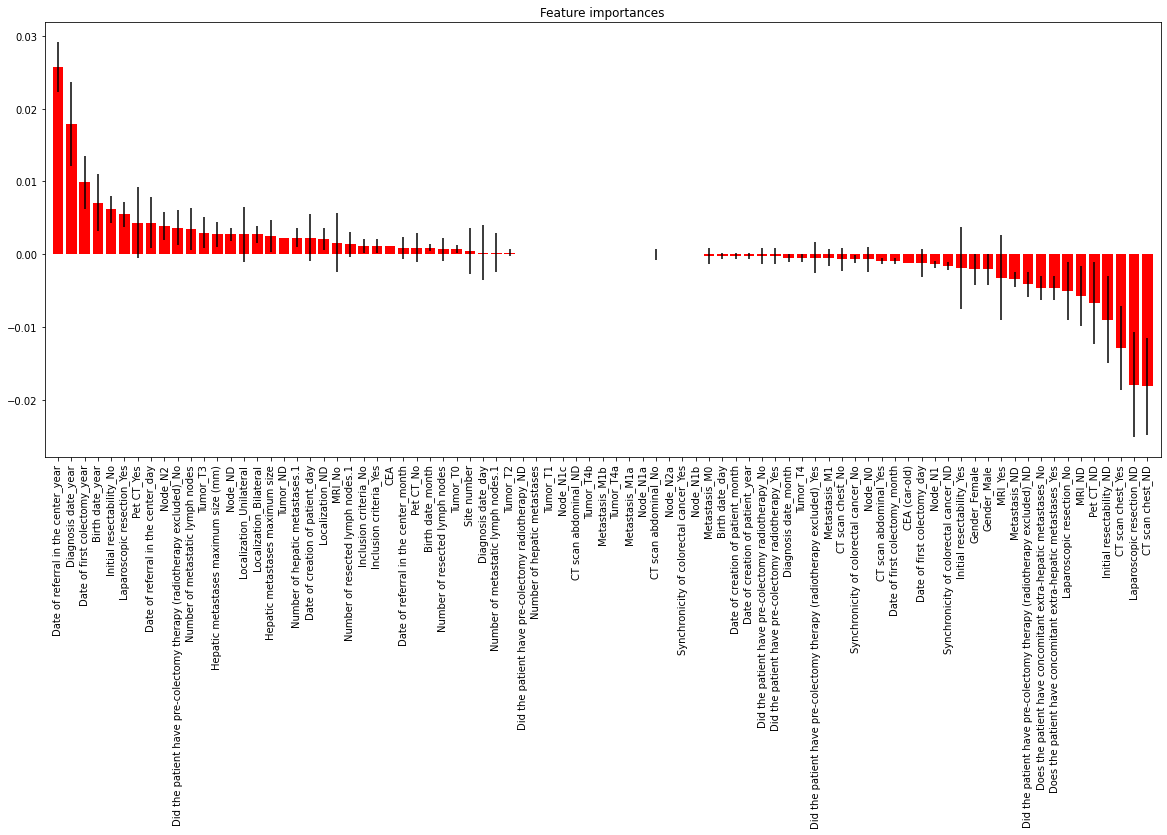

In [ ]:
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(range(X_test.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(ticks=range(X_test.shape[1]), labels=[X_train.columns[indices[i]] for i in range(len(X_train.columns))], rotation=90)
plt.xlim([-1, X_test.shape[1]])
plt.show()

In [ ]:
selected_columns = X_train.columns[indices[0:42]]
#print(selected_columns)

nb_new = BernoulliNB()
nb_new.fit(X_train[selected_columns], y_train)
y_pred_new = nb_new.predict(X_test[selected_columns])

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_new))

Accuracy: 0.7385321100917431


# Select Common Features

{'Date of referral in the center_year': 322, 'Initial resectability_Yes': 47, 'Date of referral in the center_month': 171, 'Birth date_day': 256, 'Number of resected lymph nodes': 266, 'Date of creation of patient_month': 20, 'Date of first colectomy_year': 311, 'Birth date_year': 414, 'Date of first colectomy_month': 235, 'Localization_Bilateral': 28, 'Pet CT_Yes': 54, 'Diagnosis date_year': 325, 'CT scan chest_ND': 22, 'Site number': 349, 'Date of creation of patient_day': 140, 'CEA': 364, 'Date of referral in the center_day': 309, 'Number of metastatic lymph nodes': 166, 'Pet CT_No': 43, 'Node_N0': 37, 'Hepatic metastases maximum size': 280, 'Number of resected lymph nodes.1': 299, 'Number of metastatic lymph nodes.1': 161, 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND': 21, 'Initial resectability_No': 39, 'Initial resectability_ND': 30, 'Hepatic metastases maximum size (mm)': 292, 'Date of first colectomy_day': 242, 'Diagnosis date_day': 244, 'Birth date_mo

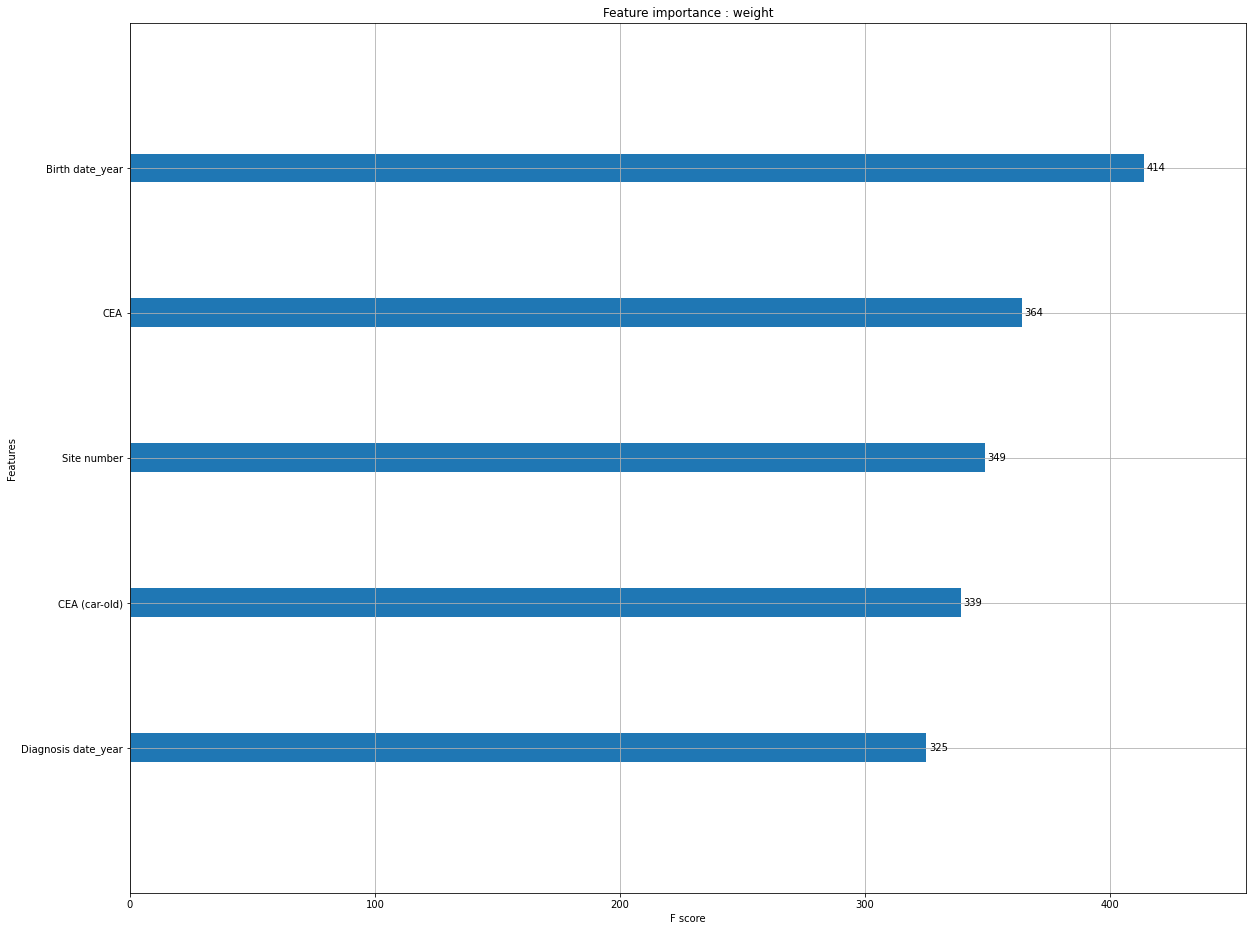

{'Date of referral in the center_year': 322, 'Initial resectability_Yes': 47, 'Date of referral in the center_month': 171, 'Birth date_day': 256, 'Number of resected lymph nodes': 266, 'Date of creation of patient_month': 20, 'Date of first colectomy_year': 311, 'Birth date_year': 414, 'Date of first colectomy_month': 235, 'Localization_Bilateral': 28, 'Pet CT_Yes': 54, 'Diagnosis date_year': 325, 'CT scan chest_ND': 22, 'Site number': 349, 'Date of creation of patient_day': 140, 'CEA': 364, 'Date of referral in the center_day': 309, 'Number of metastatic lymph nodes': 166, 'Pet CT_No': 43, 'Node_N0': 37, 'Hepatic metastases maximum size': 280, 'Number of resected lymph nodes.1': 299, 'Number of metastatic lymph nodes.1': 161, 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND': 21, 'Initial resectability_No': 39, 'Initial resectability_ND': 30, 'Hepatic metastases maximum size (mm)': 292, 'Date of first colectomy_day': 242, 'Diagnosis date_day': 244, 'Birth date_mo

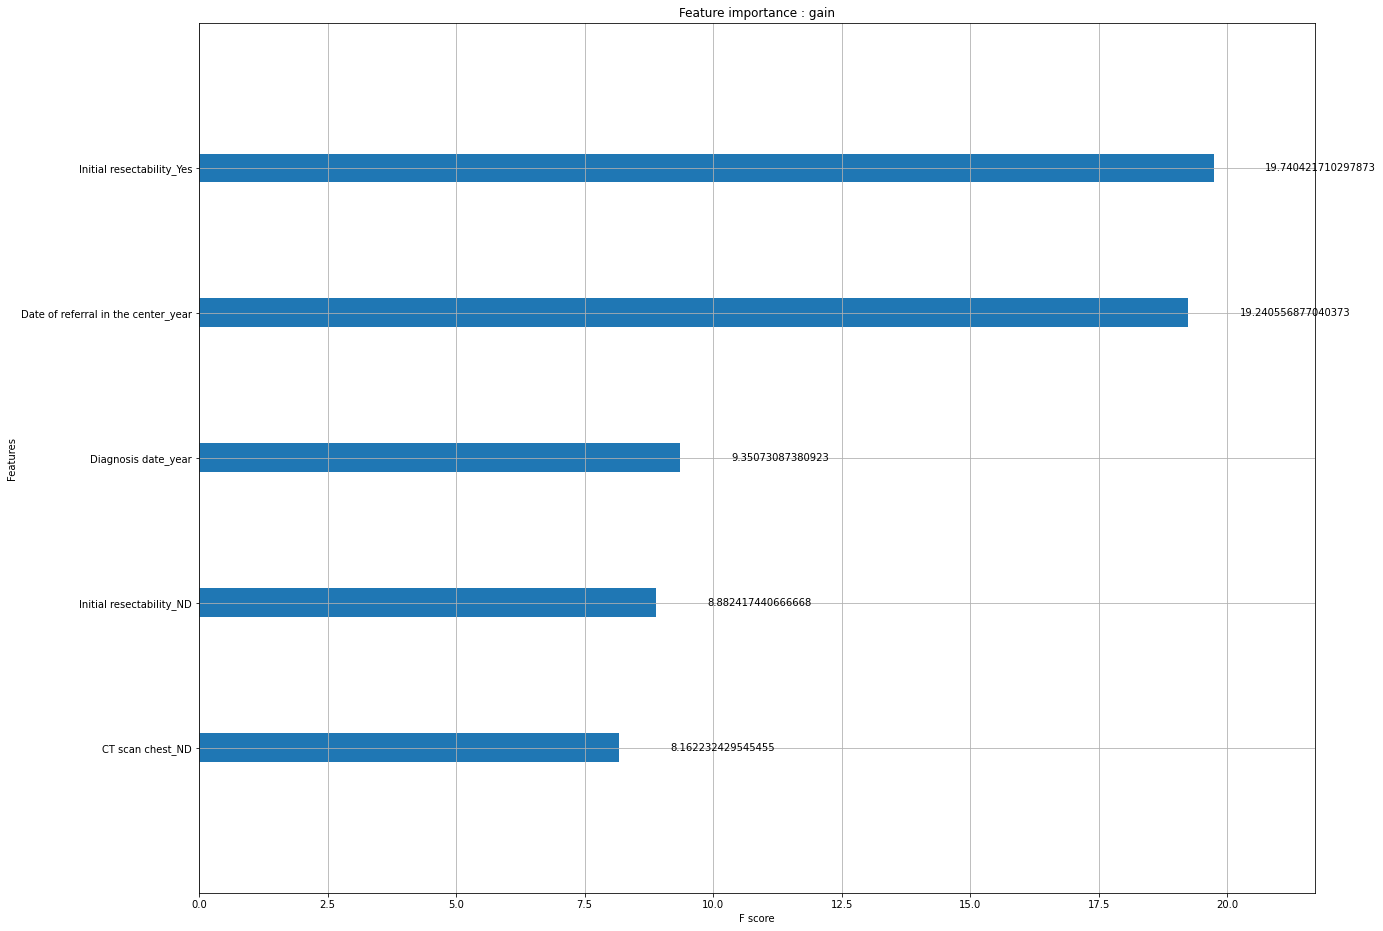

{'Date of referral in the center_year': 322, 'Initial resectability_Yes': 47, 'Date of referral in the center_month': 171, 'Birth date_day': 256, 'Number of resected lymph nodes': 266, 'Date of creation of patient_month': 20, 'Date of first colectomy_year': 311, 'Birth date_year': 414, 'Date of first colectomy_month': 235, 'Localization_Bilateral': 28, 'Pet CT_Yes': 54, 'Diagnosis date_year': 325, 'CT scan chest_ND': 22, 'Site number': 349, 'Date of creation of patient_day': 140, 'CEA': 364, 'Date of referral in the center_day': 309, 'Number of metastatic lymph nodes': 166, 'Pet CT_No': 43, 'Node_N0': 37, 'Hepatic metastases maximum size': 280, 'Number of resected lymph nodes.1': 299, 'Number of metastatic lymph nodes.1': 161, 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND': 21, 'Initial resectability_No': 39, 'Initial resectability_ND': 30, 'Hepatic metastases maximum size (mm)': 292, 'Date of first colectomy_day': 242, 'Diagnosis date_day': 244, 'Birth date_mo

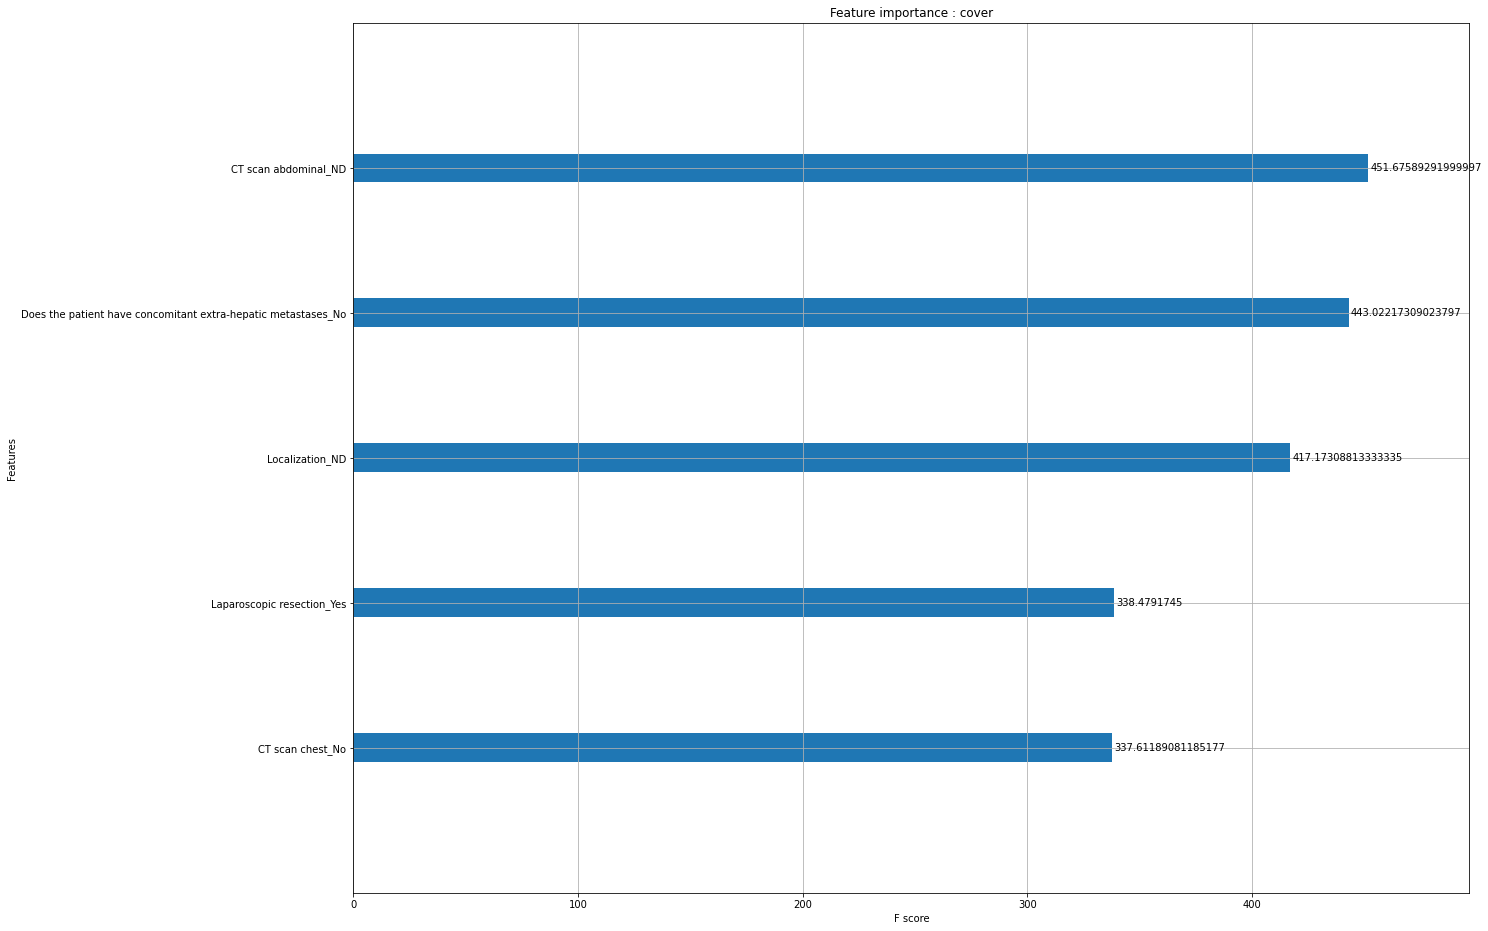

{'Date of referral in the center_year': 322, 'Initial resectability_Yes': 47, 'Date of referral in the center_month': 171, 'Birth date_day': 256, 'Number of resected lymph nodes': 266, 'Date of creation of patient_month': 20, 'Date of first colectomy_year': 311, 'Birth date_year': 414, 'Date of first colectomy_month': 235, 'Localization_Bilateral': 28, 'Pet CT_Yes': 54, 'Diagnosis date_year': 325, 'CT scan chest_ND': 22, 'Site number': 349, 'Date of creation of patient_day': 140, 'CEA': 364, 'Date of referral in the center_day': 309, 'Number of metastatic lymph nodes': 166, 'Pet CT_No': 43, 'Node_N0': 37, 'Hepatic metastases maximum size': 280, 'Number of resected lymph nodes.1': 299, 'Number of metastatic lymph nodes.1': 161, 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND': 21, 'Initial resectability_No': 39, 'Initial resectability_ND': 30, 'Hepatic metastases maximum size (mm)': 292, 'Date of first colectomy_day': 242, 'Diagnosis date_day': 244, 'Birth date_mo

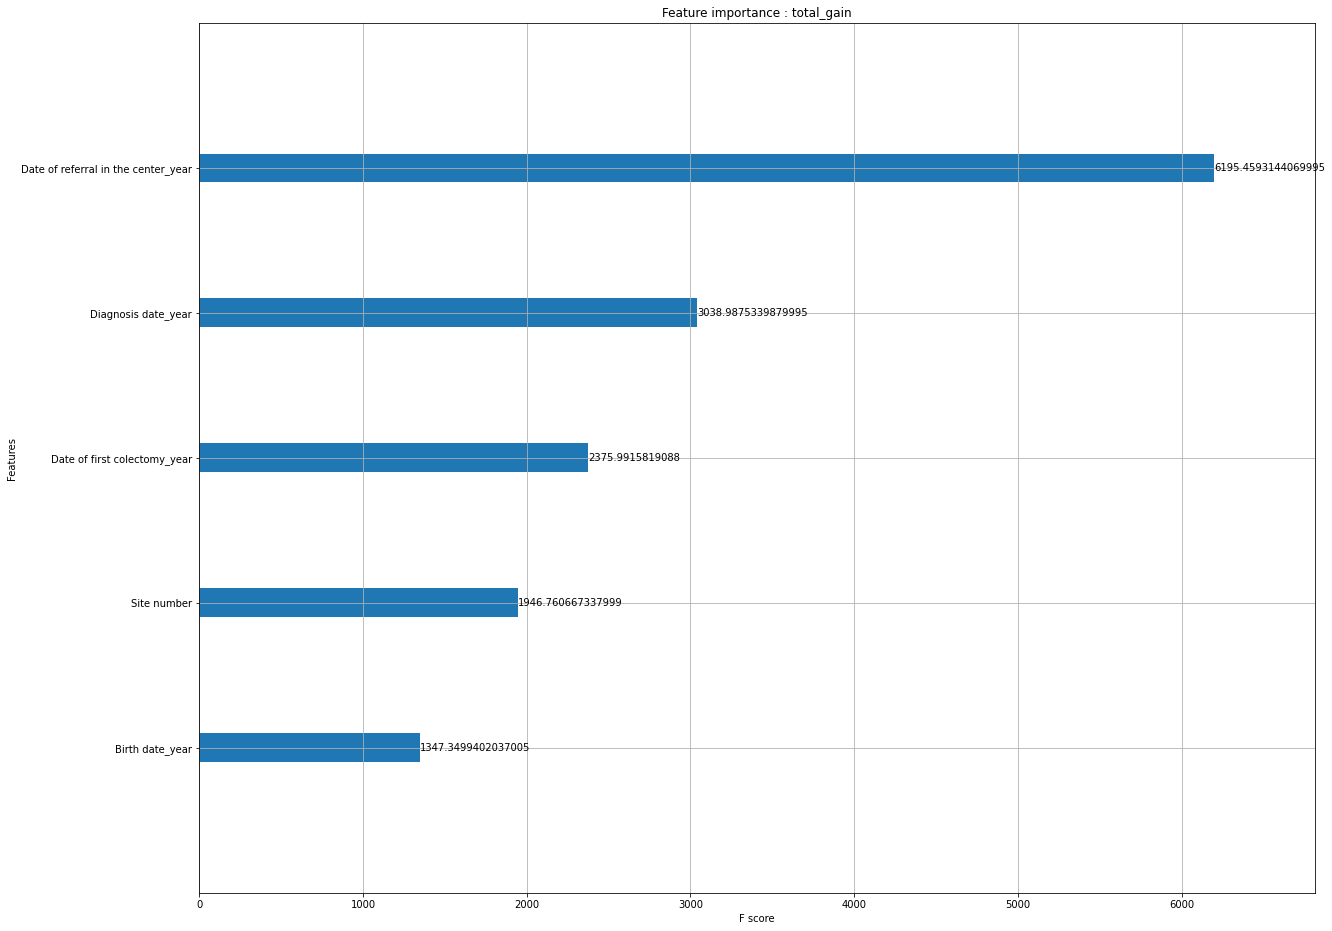

{'Date of referral in the center_year': 322, 'Initial resectability_Yes': 47, 'Date of referral in the center_month': 171, 'Birth date_day': 256, 'Number of resected lymph nodes': 266, 'Date of creation of patient_month': 20, 'Date of first colectomy_year': 311, 'Birth date_year': 414, 'Date of first colectomy_month': 235, 'Localization_Bilateral': 28, 'Pet CT_Yes': 54, 'Diagnosis date_year': 325, 'CT scan chest_ND': 22, 'Site number': 349, 'Date of creation of patient_day': 140, 'CEA': 364, 'Date of referral in the center_day': 309, 'Number of metastatic lymph nodes': 166, 'Pet CT_No': 43, 'Node_N0': 37, 'Hepatic metastases maximum size': 280, 'Number of resected lymph nodes.1': 299, 'Number of metastatic lymph nodes.1': 161, 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND': 21, 'Initial resectability_No': 39, 'Initial resectability_ND': 30, 'Hepatic metastases maximum size (mm)': 292, 'Date of first colectomy_day': 242, 'Diagnosis date_day': 244, 'Birth date_mo

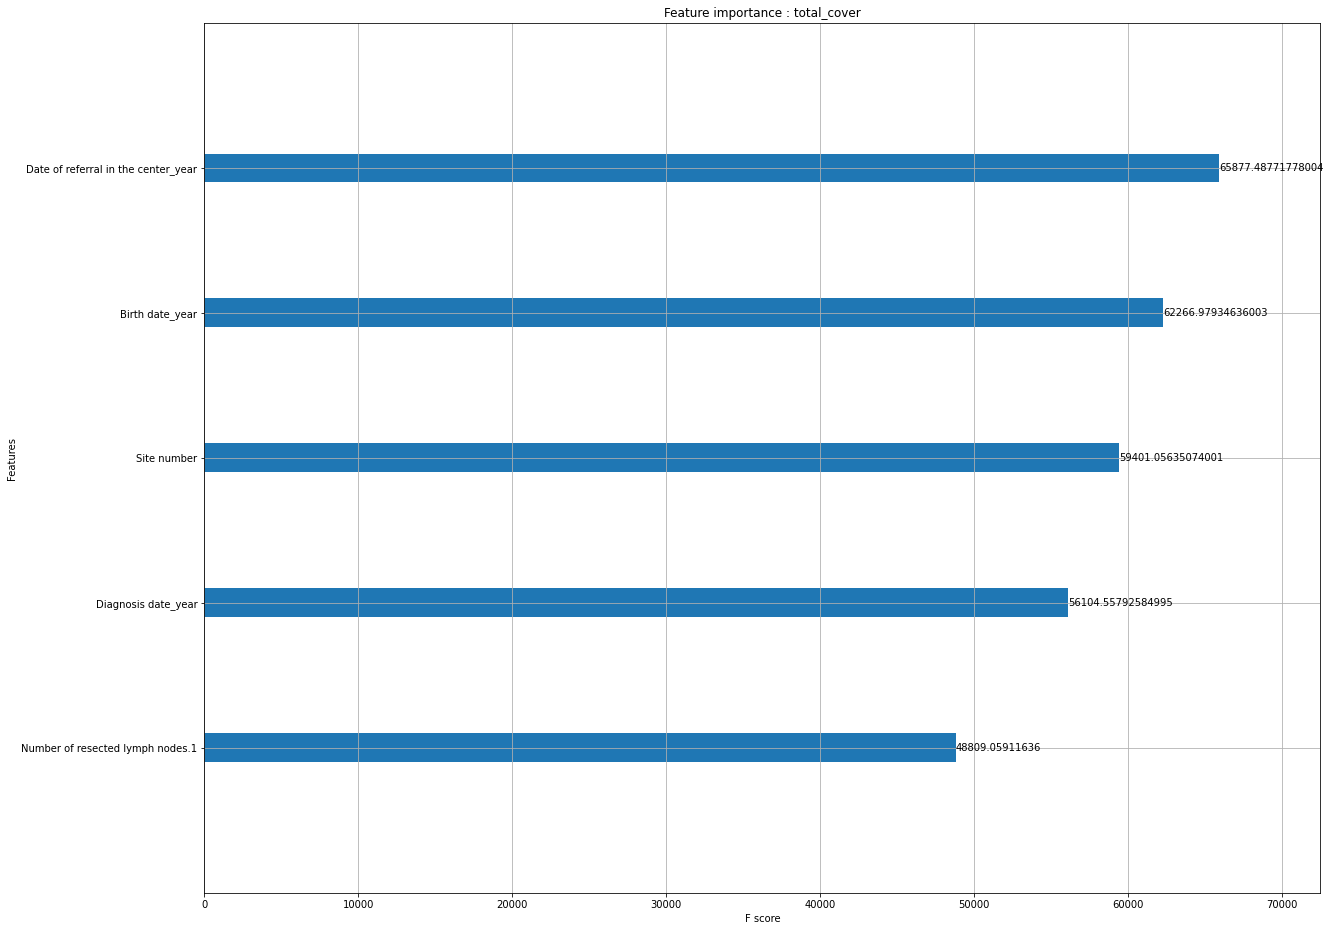

In [ ]:
from xgboost import plot_importance

# available metrics in xgb
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
num_of_features = 5;
# plot feature importance

for f in importance_types:
  fig, ax = plt.subplots(figsize=(20, 16))
  plot_importance(xgb, importance_type=f, title='Feature importance'+' : '+f, max_num_features=num_of_features, ax=ax)
  print(xgb.get_booster().get_fscore())
  plt.show()

In [ ]:
xgb.get_booster().get_score(importance_type='weight')
sorted_idx = xgb.feature_importances_.argsort()[::-1][:5]
dataset.columns[sorted_idx]

Index(['Initial resectability_ND', 'Birth date_month',
       'Date of first colectomy_month', 'Pet CT_No', 'CT scan abdominal_No'],
      dtype='object')

In [ ]:
importance_types = ['weight', 'gain', 'cover', 'total_gain', 'total_cover']
num_of_features = 41;
# plot feature importance

for f in importance_types:
  xgb.get_booster().get_score(importance_type=f)
  sorted_idx = xgb.feature_importances_.argsort()[::-1][:num_of_features]
  print(list(X.columns[sorted_idx]))

['Initial resectability_Yes', 'Date of referral in the center_year', 'Diagnosis date_year', 'Initial resectability_ND', 'CT scan chest_ND', 'Date of first colectomy_year', 'Date of creation of patient_month', 'Localization_Unilateral', 'Site number', 'Date of creation of patient_day', 'Pet CT_Yes', 'CT scan abdominal_Yes', 'Tumor_T2', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND', 'Node_N2', 'Date of referral in the center_month', 'Pet CT_ND', 'Node_N0', 'Localization_Bilateral', 'Metastasis_ND', 'Synchronicity of colorectal cancer_Yes', 'Number of hepatic metastases.1', 'Pet CT_No', 'CT scan chest_Yes', 'Number of metastatic lymph nodes.1', 'Diagnosis date_day', 'Birth date_year', 'Number of metastatic lymph nodes', 'Initial resectability_No', 'Laparoscopic resection_ND', 'MRI_ND', 'CEA', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_No', 'Number of resected lymph nodes', 'MRI_No', 'MRI_Yes', 'Date of first colectomy_day', 'CEA (car-old)

In [ ]:
# xgb all features

xgb_built_in = ['Initial resectability_Yes', 'Date of referral in the center_year', 'Diagnosis date_year', 'Initial resectability_ND', 'CT scan chest_ND', 'Date of first colectomy_year', 'Date of creation of patient_month', 'Localization_Unilateral', 'Site number', 'Date of creation of patient_day', 'Pet CT_Yes', 'CT scan abdominal_Yes', 'Tumor_T2', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND', 'Node_N2', 'Date of referral in the center_month', 'Pet CT_ND', 'Node_N0', 'Localization_Bilateral', 'Metastasis_ND', 'Synchronicity of colorectal cancer_Yes', 'Number of hepatic metastases.1', 'Pet CT_No', 'CT scan chest_Yes', 'Number of metastatic lymph nodes.1', 'Diagnosis date_day', 'Birth date_year', 'Number of metastatic lymph nodes', 'Initial resectability_No', 'Laparoscopic resection_ND', 'MRI_ND', 'CEA', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_No', 'Number of resected lymph nodes', 'MRI_No', 'MRI_Yes', 'Date of first colectomy_day', 'CEA (car-old)', 'Metastasis_M0', 'Birth date_day', 'Tumor_ND']

xgb_rfecv = ['Site number', 'Number of resected lymph nodes',
 'Number of resected lymph nodes.1', 'Number of metastatic lymph nodes',
 'Number of metastatic lymph nodes.1', 'Number of hepatic metastases.1',
 'CEA' 'CEA (car-old)', 'Birth date_year',
 'Date of referral in the center_year',
 'Date of referral in the center_month',
 'Date of creation of patient_month' ,'Date of creation of patient_day',
 'Date of first colectomy_year', 'Date of first colectomy_day',
 'Diagnosis date_year', 'Diagnosis date_day',
 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND',
 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_No',
 'Laparoscopic resection_ND', 'Laparoscopic resection_No', 'Tumor_T2',
 'Node_N0', 'Node_N2' ,'Metastasis_ND' ,'Localization_Bilateral',
 'Localization_Unilateral', 'CT scan abdominal_ND' ,'CT scan abdominal_Yes',
 'CT scan chest_ND' ,'CT scan chest_Yes' ,'MRI_ND' ,'MRI_No', 'MRI_Yes',
 'Pet CT_ND', 'Pet CT_No', 'Pet CT_Yes' ,'Initial resectability_ND',
 'Initial resectability_No', 'Initial resectability_Yes',
 'Does the patient have concomitant extra-hepatic metastases_No']


# xgb common features

xgb_common_features = list(set(xgb_built_in) & set(xgb_rfecv))
print('XGB number of common features : ', len(xgb_common_features))
print(xgb_common_features)

XGB number of common features :  35
['Pet CT_Yes', 'Site number', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_No', 'Initial resectability_Yes', 'Diagnosis date_day', 'Date of first colectomy_year', 'Diagnosis date_year', 'Tumor_T2', 'Pet CT_No', 'Number of hepatic metastases.1', 'Date of referral in the center_year', 'Localization_Unilateral', 'CT scan chest_ND', 'Laparoscopic resection_ND', 'Node_N2', 'MRI_Yes', 'Number of metastatic lymph nodes.1', 'Date of referral in the center_month', 'Metastasis_ND', 'Date of creation of patient_day', 'Pet CT_ND', 'Initial resectability_ND', 'Number of metastatic lymph nodes', 'Node_N0', 'CT scan chest_Yes', 'Initial resectability_No', 'CT scan abdominal_Yes', 'MRI_No', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND', 'Localization_Bilateral', 'Number of resected lymph nodes', 'MRI_ND', 'Birth date_year', 'Date of first colectomy_day', 'Date of creation of patient_month']


In [ ]:
print(list(X.columns[indices[:56]]))

['Date of referral in the center_year', 'Diagnosis date_year', 'Date of first colectomy_year', 'Birth date_year', 'Initial resectability_No', 'Date of referral in the center_day', 'Laparoscopic resection_Yes', 'Site number', 'Node_N2', 'MRI_No', 'Hepatic metastases maximum size (mm)', 'Node_ND', 'Date of creation of patient_day', 'Hepatic metastases maximum size', 'Localization_Unilateral', 'Number of resected lymph nodes', 'Date of referral in the center_month', 'Number of hepatic metastases.1', 'Tumor_T3', 'Localization_ND', 'Pet CT_No', 'Tumor_ND', 'Tumor_T0', 'Number of resected lymph nodes.1', 'Inclusion criteria_Yes', 'Inclusion criteria_No', 'Localization_Bilateral', 'Pet CT_Yes', 'Number of metastatic lymph nodes', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_Yes', 'Date of first colectomy_day', 'Did the patient have pre-colectomy radiotherapy_No', 'Did the patient have pre-colectomy radiotherapy_Yes', 'CEA', 'Initial resectability_Yes', 'Tumor_T2', 'Tumo

In [ ]:
svm_features_list = ['Birth date_year', 'Date of referral in the center_year',
 'Date of creation of patient_month', 'Date of creation of patient_day',
 'Date of first colectomy_year', 'Diagnosis date_year', 'Diagnosis date_day',
 'Node_N2', 'Synchronicity of colorectal cancer_ND',
 'Localization_Unilateral', 'CT scan abdominal_ND', 'CT scan chest_ND',
 'CT scan chest_No', 'CT scan chest_Yes','MRI_No', 'Pet CT_Yes',
 'Initial resectability_No']

xgb_features_list = ['Pet CT_Yes', 'Site number', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_No', 'Initial resectability_Yes', 'Diagnosis date_day', 'Date of first colectomy_year', 'Diagnosis date_year', 'Tumor_T2', 'Pet CT_No', 'Number of hepatic metastases.1', 'Date of referral in the center_year', 'Localization_Unilateral', 'CT scan chest_ND', 'Laparoscopic resection_ND', 'Node_N2', 'MRI_Yes', 'Number of metastatic lymph nodes.1', 'Date of referral in the center_month', 'Metastasis_ND', 'Date of creation of patient_day', 'Pet CT_ND', 'Initial resectability_ND', 'Number of metastatic lymph nodes', 'Node_N0', 'CT scan chest_Yes', 'Initial resectability_No', 'CT scan abdominal_Yes', 'MRI_No', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_ND', 'Localization_Bilateral', 'Number of resected lymph nodes', 'MRI_ND', 'Birth date_year', 'Date of first colectomy_day', 'Date of creation of patient_month']

bnb_features_list = ['Date of referral in the center_year', 'Diagnosis date_year', 'Date of first colectomy_year', 'Birth date_year', 'Initial resectability_No', 'Date of referral in the center_day', 'Laparoscopic resection_Yes', 'Site number', 'Node_N2', 'MRI_No', 'Hepatic metastases maximum size (mm)', 'Node_ND', 'Date of creation of patient_day', 'Hepatic metastases maximum size', 'Localization_Unilateral', 'Number of resected lymph nodes', 'Date of referral in the center_month', 'Number of hepatic metastases.1', 'Tumor_T3', 'Localization_ND', 'Pet CT_No', 'Tumor_ND', 'Tumor_T0', 'Number of resected lymph nodes.1', 'Inclusion criteria_Yes', 'Inclusion criteria_No', 'Localization_Bilateral', 'Pet CT_Yes', 'Number of metastatic lymph nodes', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_Yes', 'Date of first colectomy_day', 'Did the patient have pre-colectomy radiotherapy_No', 'Did the patient have pre-colectomy radiotherapy_Yes', 'CEA', 'Initial resectability_Yes', 'Tumor_T2', 'Tumor_T4', 'CT scan abdominal_No', 'Birth date_month', 'Did the patient have pre-colectomy therapy (radiotherapy excluded)_No', 'CT scan abdominal_ND', 'Date of creation of patient_month', 'Did the patient have pre-colectomy radiotherapy_ND', 'Date of creation of patient_year', 'Number of hepatic metastases', 'Tumor_T1', 'Node_N1b', 'Node_N2a', 'Synchronicity of colorectal cancer_Yes', 'Tumor_T4a', 'Tumor_T4b', 'Metastasis_M1b', 'Metastasis_M1a', 'Node_N1a', 'Metastasis_M0', 'Node_N1c']


In [ ]:
common_features = list(set(svm_features_list) & set(xgb_features_list) & set(bnb_features_list))
print('Number of common features : ', len(common_features))
print(common_features)

Number of common features :  11
['Pet CT_Yes', 'Localization_Unilateral', 'Initial resectability_No', 'Date of creation of patient_day', 'Date of referral in the center_year', 'Date of first colectomy_year', 'Diagnosis date_year', 'Birth date_year', 'Node_N2', 'MRI_No', 'Date of creation of patient_month']


In [ ]:
selected_features = ['Pet CT_Yes', 'Localization_Unilateral', 'Initial resectability_No', 'Date of creation of patient_day', 'Date of referral in the center_year', 'Date of first colectomy_year', 'Diagnosis date_year', 'Birth date_year', 'Node_N2', 'MRI_No', 'Date of creation of patient_month']

X_selected = dataset[selected_features]
y_selected = dataset.PATIENT_STATUS

print(X_selected)


      Pet CT_Yes  ...  Date of creation of patient_month
0              0  ...                                  6
1              0  ...                                  6
2              0  ...                                  6
3              0  ...                                  6
4              0  ...                                  6
...          ...  ...                                ...
4354           0  ...                                  6
4355           0  ...                                  6
4356           0  ...                                  6
4357           0  ...                                  6
4358           0  ...                                  6

[4359 rows x 11 columns]


In [ ]:
#Import svm model
from sklearn import svm
# nb_new = BernoulliNB() # 73.2%
# nb_new =XGBClassifier(learning_rate = 0.05, n_estimators=300, max_depth=5, random_state=109) # 74.5%
nb_new = svm.SVC(kernel='linear') # 74.19%
nb_new.fit(X_train[selected_columns], y_train)
y_pred_new = nb_new.predict(X_test[selected_columns])

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_new))

In [ ]:
#Importing required libraries
from sklearn.model_selection import KFold 
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.naive_bayes import BernoulliNB
from sklearn import svm

#Create a svm Classifier

#Implementing cross validation
k = 5
seed = 1
kf = KFold(n_splits=k, random_state=seed, shuffle=True)

models = {
    'xgb_clf': XGBClassifier(),
    'nb_clf': BernoulliNB(),
    'svm_clf': svm.SVC()
    }
# svm_clf = svm.SVC(kernel='linear', random_state=109)

results = {}

for name, model in models.items():
  results[name] = list(cross_val_score(model, X_train[selected_features], y_train, cv=kf))
  print(name, np.mean(results[name]))

print(results)



xgb_clf 0.7367276045927491
nb_clf 0.7198102387226468
svm_clf 0.7312851228967372
{'xgb_clf': [0.7464183381088825, 0.7578796561604585, 0.7403156384505022, 0.7101865136298422, 0.7288378766140603], 'nb_clf': [0.7363896848137536, 0.7249283667621776, 0.7216642754662841, 0.7015781922525107, 0.7144906743185079], 'svm_clf': [0.7177650429799427, 0.7535816618911175, 0.7431850789096126, 0.7116212338593975, 0.7302725968436155]}
